# Yandex.Afisha. Advertisements cost effectiveness study

Study plan:

1. Loading and preparing data
2. Research of user activity
3. Sales research
4. Study of advertising costs and revenues from attracted buyers
5. Conclusions

## Step 1. Loading and preparing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Original dataframes
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

### Dataframe 'visits'

In [3]:
# Let's rename columns so that their names were more understandable
visits.columns =['device', 'end_ts', 'source_id', 'start_ts', 'uid']
# Let's make data type for date be datetime
visits.end_ts = pd.to_datetime(visits.end_ts)
visits.start_ts = pd.to_datetime(visits.start_ts)

print(visits.info())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### Orders dataframe

In [4]:
# Let's rename the columns
orders.columns = ['buy_ts', 'revenue', 'uid']
# let's make data type for purchase timestamp be datetime
orders.buy_ts = pd.to_datetime(orders.buy_ts)

print(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### Costs dataframe

In [5]:
# let's make data type for advertising costs timestamp be datetime
costs.dt = pd.to_datetime(costs.dt)

print(costs.info())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


No missing values found in original dataframes

## Step 2. Reports and Metrics

### The number of people using the service every month, every week, every day - by device type.

In [6]:
# Let's add to the dataframe columns of year, month, week and day of the visit
visits['year'] = visits.start_ts.dt.year
visits['month'] = visits.start_ts.astype('datetime64[M]')
visits['week'] = visits.start_ts.dt.week
visits['day'] = visits.start_ts.dt.date
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


In [7]:
# Let's make queries for those device types as 'touch'and 'desktop'
touch_users = visits.query('device == "touch"')
desktop_users = visits.query('device == "desktop"')

6825
16724


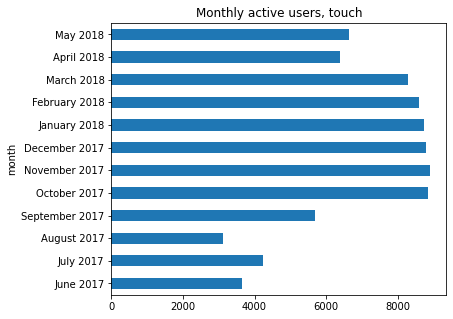

In [8]:
# let's calculate Month activity of user (MAU) metric for both queries
touch_users_per_month = touch_users.groupby('month').agg({'uid': 'nunique'})
desktop_users_per_month = desktop_users.groupby('month').agg({'uid': 'nunique'})
# The average MAU for both queries
mean_touch_users_per_month = int(touch_users_per_month.uid.mean())
mean_desktop_users_per_month = int(desktop_users_per_month.uid.mean())
print(mean_touch_users_per_month)
print(mean_desktop_users_per_month)
# Monthly active users, touch devices - graph
ax = touch_users_per_month.uid.plot(kind= 'barh', figsize = (6, 5))
plt.title('Monthly active users, touch')
ax.set_yticklabels(['June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 2017', 'November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018'])
plt.show()

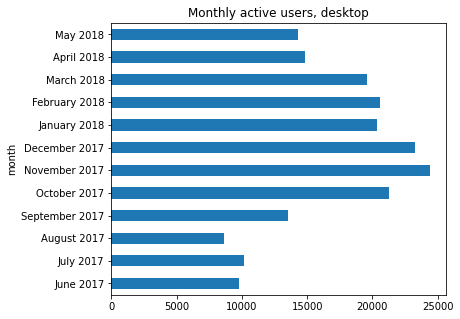

In [9]:
# Monthly active users, desktop devices - graph
ax = desktop_users_per_month.uid.plot(kind= 'barh', figsize = (6, 5))
plt.title('Monthly active users, desktop')
ax.set_yticklabels(['June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 2017', 'November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018'])
plt.show()

1634
4129


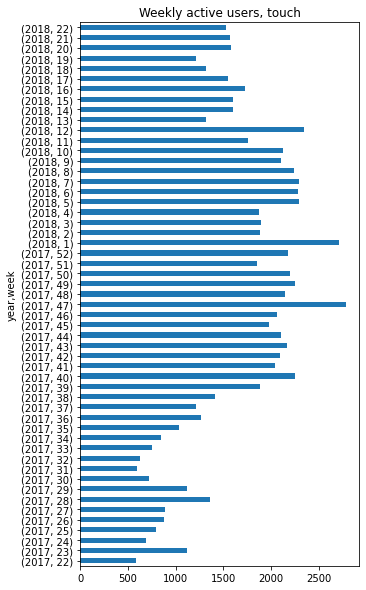

In [10]:
# Week activity of user (WAU)
touch_users_per_week = touch_users.groupby(['year','week']).agg({'uid': 'nunique'})
mean_touch_users_per_week = touch_users_per_week.mean()
print(int(mean_touch_users_per_week))

desktop_users_per_week = desktop_users.groupby(['year','week']).agg({'uid': 'nunique'})
mean_desktop_users_per_week = desktop_users_per_week.mean()
print(int(mean_desktop_users_per_week))

# Weekly active users, touch devices - graph
ax = touch_users_per_week.uid.plot(kind = 'barh', figsize = (5, 10))
plt.title('Weekly active users, touch')
plt.show()

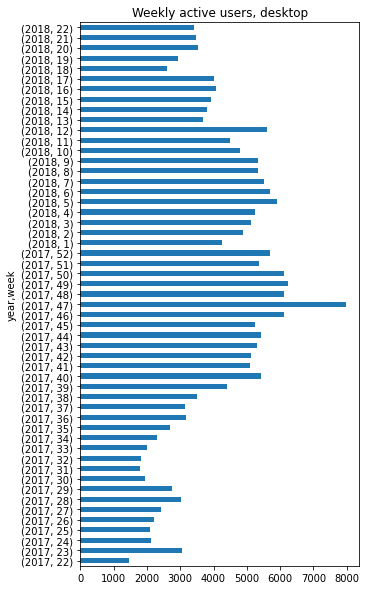

In [11]:
# Weekly active users, desktop devices - graph
ax = desktop_users_per_week.uid.plot(kind = 'barh', figsize = (5, 10))
plt.title('Weekly active users, desktop')
plt.show()

In [12]:
# Day activity of user (DAU)
mean_touch_users_per_day = touch_users.groupby('day').agg({'uid': 'nunique'}).mean()
print(int(mean_touch_users_per_day))
mean_desktop_users_per_day = desktop_users.groupby('day').agg({'uid': 'nunique'}).mean()
print(int(mean_desktop_users_per_day))

252
659


The site is visited more often from a computer than from a mobile phone. At the same time, the graphs show the same trends for users of stationary and mobile devices. In general, user activity strongly depends on the season. Summer is the "off season". In autumn, the theater season begins, and there is a sharp increase in activity: over the summer, everyone missed performances and concerts. The peak of activity is in November. Apparently, in November, other forms of leisure are less accessible (it's already cold, but it's too early to ski, there is no snow). In winter, the activity is less, but not much. In April it becomes more interesting and pleasant to walk outside, and concerts with performances by that time, apparently, start to pall.

### Sessions per user

In [13]:
# Let's calculate number of sessions and number of unique users - monthly and daily
sessions = visits.groupby(['month','day']).agg({'uid': ['count', 'nunique']}).reset_index()
sessions.set_axis(['month', 'day', 'sessions', 'users'], axis = 'columns', inplace=True)
# Let's calculate number of sessions per user
sessions['sess_per_user'] = sessions['sessions'] / sessions['users']
display(sessions.head())

,month,day,sessions,users,sess_per_user
0,2017-06-01,2017-06-01,664,605,1.097521
1,2017-06-01,2017-06-02,658,608,1.082237
2,2017-06-01,2017-06-03,477,445,1.071910
3,2017-06-01,2017-06-04,510,476,1.071429
4,2017-06-01,2017-06-05,893,820,1.089024


In [14]:
# Let's calculate the average number of sessions per user for every month
sessions_grouped = sessions.groupby('month').agg({'sess_per_user':'mean'})
display(sessions_grouped)

,sess_per_user
month,
2017-06-01,1.073938
2017-07-01,1.077657
2017-08-01,1.066927
2017-09-01,1.076044
2017-10-01,1.077773
2017-11-01,1.093053
2017-12-01,1.090265
2018-01-01,1.085976
2018-02-01,1.089924


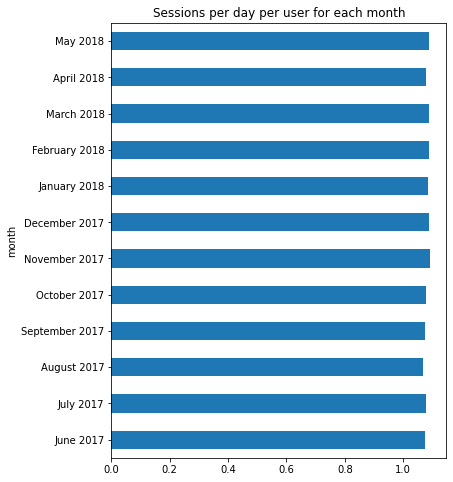

In [15]:
# Vizualization of result
ax = sessions_grouped.sess_per_user.plot(kind = 'barh', figsize =(6, 8))
ax.set_yticklabels(['June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 2017', 'November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018'])
plt.title('Sessions per day per user for each month')
plt.show()

In [16]:
print(sessions_grouped.sess_per_user.mean())

1.0822094906655846


The average number of sessions per user is not almost being changed from month to month. Thus, the average number of sessions for the entire study period is 1.08, while the average values by month fluctuate in the range of 1.06 - 1.09.

### How long does an average session last?

In [17]:
# Let's count in minutes
visits['session_minutes'] = ((visits.end_ts - visits.start_ts) / np.timedelta64(1, 'm')).astype('int')

# Mean, median and mode
print(visits.session_minutes.mean())
print(visits.session_minutes.median())
print(int(visits.session_minutes.mode()))
display(visits.head())

10.716329994435169
5.0
1


,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,28
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0


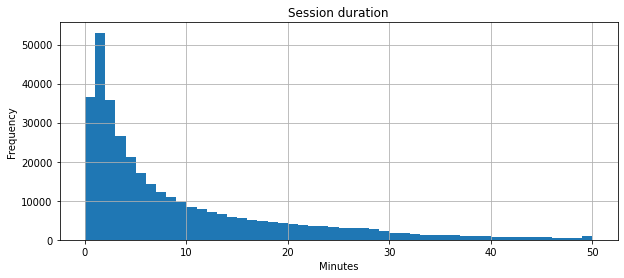

In [18]:
# Vizualization of result
ax = visits.session_minutes.hist(range=(0, 50), bins=50, figsize = (10, 4))
ax.set_xlabel('Minutes')
ax.set_ylabel('Frequency')
plt.title('Session duration')
plt.show()

The most typical session lasts from 1 to 10 minutes. Sessions lasting more than half an hour are very rare.
The most common value is "1 minute", with half of all sessions lasting within five minutes. Average (10 minutes) is shifted due to outliers and sparse values.

### Retention rate

In [19]:
# Let's calculate the minimum value for start_ts (first visit time) for every user
first_visits = visits.groupby('uid').agg({'start_ts': 'min'})
first_visits.columns = ['first_visit']
# Let's find out the month of the first visit
first_visits['first_visit_month'] = first_visits.first_visit.astype('datetime64[M]')
display(first_visits.head())

,first_visit,first_visit_month
uid,,
11863502262781,2018-03-01 17:27:00,2018-03-01
49537067089222,2018-02-06 15:55:00,2018-02-01
297729379853735,2017-06-07 18:47:00,2017-06-01
313578113262317,2017-09-18 22:49:00,2017-09-01
325320750514679,2017-09-30 14:29:00,2017-09-01


In [20]:
# Let's merge dataframes 'visits' and 'first_visits'
visits = visits.merge(first_visits, on = 'uid')
# Let's calculate current user's lifetime for every row in 'visits' dataframe
visits['lifetime'] = ((visits.month - visits.first_visit_month) / np.timedelta64(1, 'M')).round().astype('int')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_minutes,first_visit,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,18,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,28,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,28,2018-03-09 20:05:00,2018-03-01,0


In [21]:
# Let's group unique users by cohorts(month of first visit) and lifetime
cohorts = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
display(cohorts.head(10))

,first_visit_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


In [22]:
# Let's find original number of users in every cohort
initial_users_count = cohorts[cohorts.lifetime == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
display(initial_users_count)

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [23]:
# Let's merge 'cohorts' and 'initial_users_count', and after that we'll calculate the retention rate dividing 
# current number of users by original one. We'll multiply the result by 100 (percents)
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts['retention_rate'] = (cohorts.uid / cohorts.cohort_users * 100).round(2)
display(cohorts.head(10))

,first_visit_month,lifetime,uid,cohort_users,retention_rate
0,2017-06-01,0,13259,13259,100.00
1,2017-06-01,1,1043,13259,7.87
2,2017-06-01,2,713,13259,5.38
3,2017-06-01,3,814,13259,6.14
4,2017-06-01,4,909,13259,6.86
5,2017-06-01,5,947,13259,7.14
6,2017-06-01,6,809,13259,6.10
7,2017-06-01,7,766,13259,5.78
8,2017-06-01,8,694,13259,5.23
9,2017-06-01,9,674,13259,5.08


In [24]:
# Pivot table for retention rate for every lifetime for every cohort
retention_rate_pivot = cohorts.pivot_table(index = 'first_visit_month', columns = 'lifetime', values = 'retention_rate')
display(retention_rate_pivot)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,100.0,7.87,5.38,6.14,6.86,7.14,6.10,5.78,5.23,5.08,4.07,4.5
2017-07-01,100.0,5.61,5.13,5.62,5.82,4.82,4.54,4.57,3.88,2.86,2.75,NaN
2017-08-01,100.0,7.69,6.29,6.28,5.01,4.40,3.63,3.95,2.79,2.60,NaN,NaN
2017-09-01,100.0,8.55,6.92,5.07,3.94,3.78,3.59,2.42,2.28,NaN,NaN,NaN
2017-10-01,100.0,7.86,5.22,3.90,3.43,3.22,2.14,2.04,NaN,NaN,NaN,NaN
2017-11-01,100.0,7.83,4.41,3.87,3.37,2.34,2.18,NaN,NaN,NaN,NaN,NaN
2017-12-01,100.0,5.58,3.80,3.11,2.03,1.90,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,100.0,5.97,3.93,2.50,2.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,100.0,5.71,2.55,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


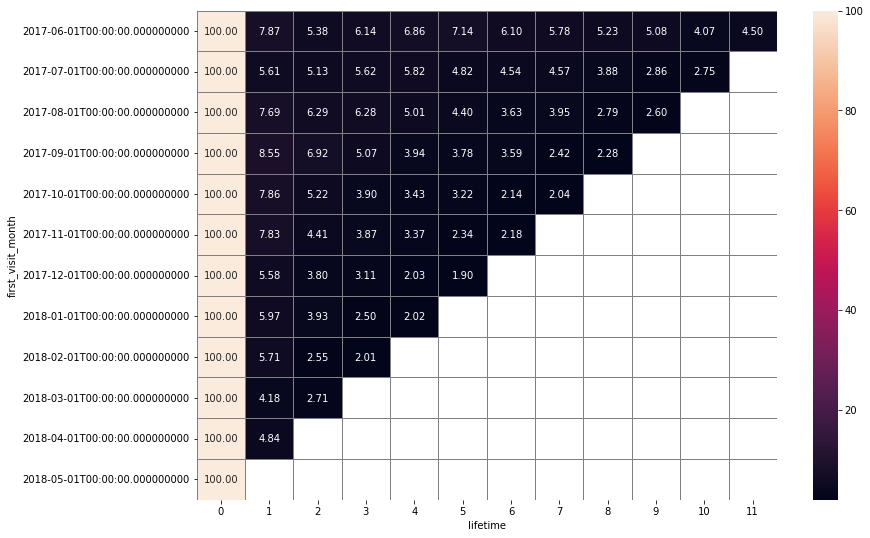

In [25]:
# Heatmap for the pivot table
plt.figure(figsize = (13, 9))
sns.heatmap(retention_rate_pivot, annot = True, fmt = '.2f', linewidths = 1, linecolor = 'gray')
plt.show()

The retention rate is very low. It never reached 10 percent. The heat map is dominated by dark purple and black.

### Sales. Time between first visit and first purchase

In [26]:
# let's create the list of users' id
buyers = orders.uid.unique()
print(len(buyers))

36523


In [27]:
# Let's make the query of 'visits' dataframe by list of buyers
# (only those who made at least one purchase)
visits_of_buyers = visits.query('uid in @buyers').reset_index(drop=True)
display(visits_of_buyers.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_minutes,first_visit,first_visit_month,lifetime
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,24,2018-03-09 20:05:00,2018-03-01,2
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,28,2018-03-09 20:05:00,2018-03-01,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,1,2017-09-03 21:35:00,2017-09-01,0
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,2017-10-01,43,2017-10-27,42,2017-09-03 21:35:00,2017-09-01,1
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,2017-09-01,36,2017-09-04,19,2017-09-03 21:35:00,2017-09-01,0


In [28]:
# Let's find the time ofe the first visit for every buyer
buyers_first_visits = visits_of_buyers.groupby('uid').agg({'first_visit': 'first'}).reset_index()
display(buyers_first_visits.head())

,uid,first_visit
0,313578113262317,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00
3,2464366381792757,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00


In [29]:
# Let's find the time of the first purchase for every buyer
first_purchases = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_purchases = first_purchases.rename(columns = {'uid': 'uid', 'buy_ts': 'first_purchase_time'})
display(first_purchases.head())

,uid,first_purchase_time
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [30]:
# We'll merge 'first_purchases' and 'buyers_first_visits'
first_purchases = first_purchases.merge(buyers_first_visits, on = 'uid')
display(first_purchases.head())

,uid,first_purchase_time,first_visit
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [31]:
# Let's calculate difference between first purchase time and first visit time in minutes
first_purchases['minutes_to_purchase'] = ((first_purchases.first_purchase_time - first_purchases.first_visit) / np.timedelta64(1, 'm')).astype('int')
display(first_purchases.head())

,uid,first_purchase_time,first_visit,minutes_to_purchase
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


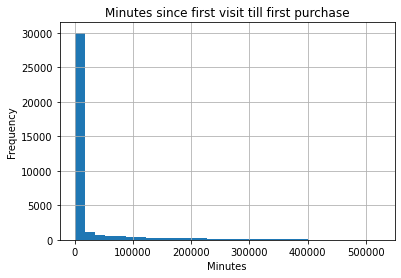

In [32]:
# We'll plot a histogram illustrating the distribution of
# values of the duration of time from the time when the buyer first visits the site to the first purchase time
ax = first_purchases.minutes_to_purchase.hist(bins = 30)
ax.set_xlabel("Minutes")
ax.set_ylabel('Frequency')
plt.title("Minutes since first visit till first purchase")
plt.show()

In [33]:
# Mode, mean, median
print(int(first_purchases.minutes_to_purchase.mode()))
print(first_purchases.minutes_to_purchase.mean())
print(first_purchases.minutes_to_purchase.median())

1
24340.175834405716
16.0


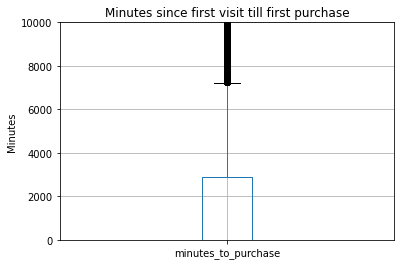

In [34]:
# Box plot, which illustrates the diapason of distribution  of the most part of values
# of time between the first visit and the first purchase
ax = first_purchases.boxplot(column = 'minutes_to_purchase')
ax.set_ylim(0, 10000)
ax.set_ylabel('Minutes')
plt.title("Minutes since first visit till first purchase")
plt.show()

Half of all buyers make purchases within the first 16 minutes, and the most frequent value is within one minute (these are probably those buyers who initially know what they want to buy and go to the site for this purpose). Three-quarters of shoppers, as seen in the box plot, make purchases within 3,000 minutes (i.e., within about two days). This means that few people go to the site just to see what is for sale there. Basically, the service is interesting not as a poster, but as a ticket office.

### The number of purchases by month

In [35]:
# Let's add columns 'year', 'month' and 'week' to the 'orders' dataframe
orders['year'] = orders.buy_ts.dt.year
orders['month'] = orders.buy_ts.dt.month
orders['week'] = orders.buy_ts.dt.week
# We'll group by year and month and calculate the number of purchases.
purchases_per_month = orders.groupby(['year', 'month']).agg({'revenue': 'count'})
purchases_per_month = purchases_per_month.rename(columns = {'year': 'year', 'month': 'month', 'revenue': 'num_purchases'})
display(purchases_per_month)

num_purchases
year month               
2017 6               2354
     7               2363
     8               1807
     9               3387
     10              5679
     11              5659
     12              6218
2018 1               4721
     2               5281
     3               5326
     4               3273
     5               4346
     6                  1

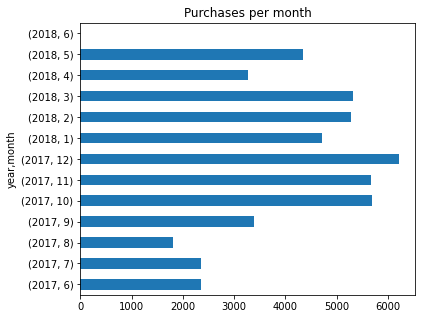

In [36]:
# Vizualization of result
purchases_per_month.num_purchases.plot(kind = 'barh', figsize = (6, 5))
plt.title('Purchases per month')
plt.show()

In [37]:
# Mean and median
print(purchases_per_month.num_purchases.median())
print(purchases_per_month.num_purchases.mean())

4346.0
3878.076923076923


Purchases are as seasonal as site visits. The peak is observed in the period from October to December, the summer is the off season. At the same time, one can note an increase in the number of purchases in May compared to April - despite the fact that site traffic, on the contrary, has fallen. The same phenomenon can be observed for the January-February pair (there are the same number of visits, but there are more purchases in February) and for the November-December pair (there were fewer visits in December, and more purchases than in November). It is difficult to understand whether this is an accident or a trend of increase in the conversion of visitors into buyers. In order to understand this, you probably need to compare year to year - April to April, May to May, etc.

### Average bill

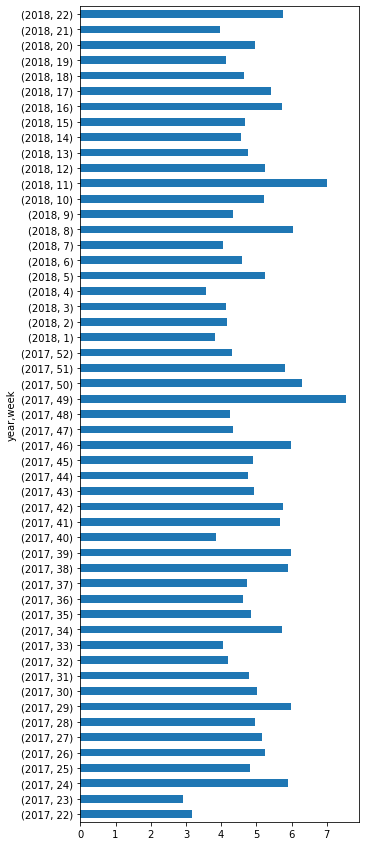

In [38]:
# Dataframe for weekly average bill
revenue_by_week = orders.groupby(['year', 'week']).agg({'revenue': 'mean'})
# The graph
revenue_by_week.revenue.plot(kind = 'barh', figsize = (5, 15))
plt.show()

In [39]:
# Average bill for the whole observated period
print(revenue_by_week.revenue.mean())

4.951729086547418


The average bill is larger in the autumn and winter weeks, while in other months there are also local peaks. For example, 24th week (mid-June), 29th (July). This is probably due to some popular events (like festivals or tours, etc.)

### Lifeteme value (LTV) by source of advertisement

In [40]:
# Let's create dataframe for the advertisment sources for every buyer 
users_sources = visits_of_buyers.groupby('uid').agg({'source_id': 'first'})
display(users_sources.head())

,source_id
uid,
313578113262317,2
1575281904278712,10
2429014661409475,3
2464366381792757,5
2551852515556206,5


In [41]:
# Sum of revenues from every buyer for whole observated period
revenue_per_buyer = orders.groupby('uid').agg({'revenue': 'sum'})
display(revenue_per_buyer.head())
# LTV
print(revenue_per_buyer.revenue.mean())

,revenue
uid,
313578113262317,0.55
1575281904278712,3.05
2429014661409475,73.33
2464366381792757,2.44
2551852515556206,10.99


6.901327930345262


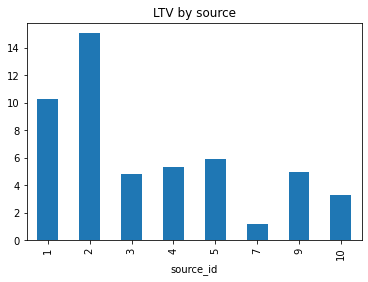

In [42]:
# Let's merge dataframes of revenues and sources
revenue_per_buyer = revenue_per_buyer.merge(users_sources, on='uid')
# Let's calculate average revenue from buyer for every source (LTV depending on source)
revenue_per_buyer_by_source = revenue_per_buyer.groupby('source_id').agg({'revenue': 'mean'})
# Graph
revenue_per_buyer_by_source.revenue.plot(kind = 'bar')
plt.title('LTV by source')
plt.show()

In [43]:
# Let's check the list of sources
print(visits.source_id.unique())

[ 4  2  5  9  3  1 10  7  6]


The average revenue per user is different for different advertising sources. So, the maximum income from the user is provided by advertising source No. 2: 15 rubles. Source number 7 brings the minimum income per user: 1 ruble. And the source number 6, which is present in the visits table, did not attract a single buyer and us absent in the statistics on the sources of buyers. The average income from the buyer (from all sources) is 7 rubles.

## Marketing

In [44]:
# How much money was spent for advertising?
total_costs = costs.costs.sum()
print(total_costs)

329131.62


In [45]:
# How much money was spent for advertising in different sources?
costs_by_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
display(costs_by_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


### Advertising costs by months and weeks

In [46]:
# Let's add columns of year, month and week into the costs dataframe
costs['year'] = costs['dt'].dt.year
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.week
display(costs.head())

,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017,6,22
1,1,2017-06-02,62.25,2017,6,22
2,1,2017-06-03,36.53,2017,6,22
3,1,2017-06-04,55.00,2017,6,22
4,1,2017-06-05,57.08,2017,6,23


In [47]:
# We'll create pivot table where observations are months, columns are sources, values are average revenues
monthly_costs_per_source = costs.pivot_table(index = ['year', 'month'], columns = 'source_id', values = 'costs', aggfunc = 'mean')
display(monthly_costs_per_source)

source_id          1           2           3           4           5   \
year month                                                              
2017 6      37.520333   80.912667  257.721667  117.160000   87.204000   
     7      34.609032   75.261613  247.560323  113.862258   96.714194   
     8      30.703548   58.420968  198.178710  103.785806   70.492903   
     9      50.067000   99.522000  332.118333  173.075333  128.304667   
     10     74.701613  156.290323  507.652903  207.123871  186.045161   
     11     81.505333  174.922667  567.511333  179.627333  210.844667   
     12     75.522581  157.993548  523.210323  247.757097  189.436129   
2018 1      70.521935  134.120645  477.702581  188.154516  173.274839   
     2      78.731429  159.797857  508.162857  203.998571  181.118214   
     3      63.103000  131.438000  436.028333  198.729000  146.116774   
     4      45.775517  103.231034  320.579655  152.016897  120.729310   
     5      47.342258   86.756129  303.594194  135.942258  118.372903   

source_id          9          10  
year month                        
2017 6       9.507333  10.474000  
     7       9.759355  10.639355  
     8       8.030000   7.502258  
     9      13.854000  15.355667  
     10     19.658387  20.233548  
     11     22.772667  26.412000  
     12     21.225161  20.834194  
2018 1      17.650323  19.817742  
     2      19.696429  17.174286  
     3      16.009667  17.547000  
     4      12.878966  13.387931  
     5      11.682903  13.221290

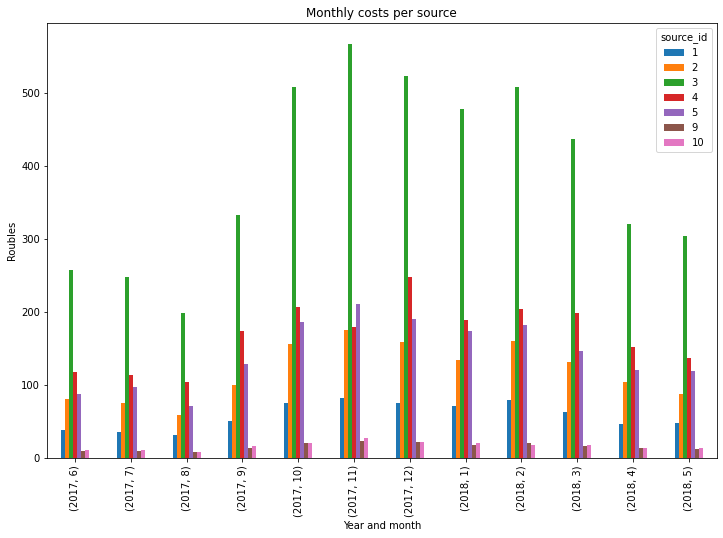

In [48]:
# Graph of advertising costs for different sources by months
ax = monthly_costs_per_source.plot(kind = 'bar', figsize = (12,8))
ax.set_ylabel("Roubles")
ax.set_xlabel("Year and month")
plt.title('Monthly costs per source')
plt.show()

The graph clearly shows that the costs of source 3 stand out in particular. This is not just the most expensive source, but its cost is many times higher than spending on any other.

In [49]:
# Let's calculate costs of advertising by months and weeks
costs_by_month = costs.groupby(['year', 'month']).agg({'costs': 'sum'})
costs_by_week = costs.groupby(['year', 'week']).agg({'costs': 'sum'})

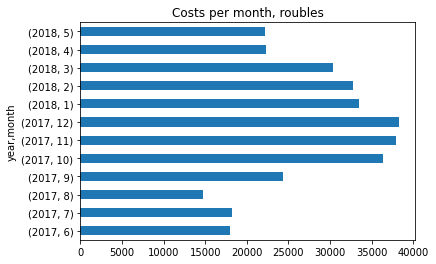

In [50]:
# Months' graph
costs_by_month.costs.plot(kind = 'barh')
plt.title('Costs per month, roubles')
plt.show()

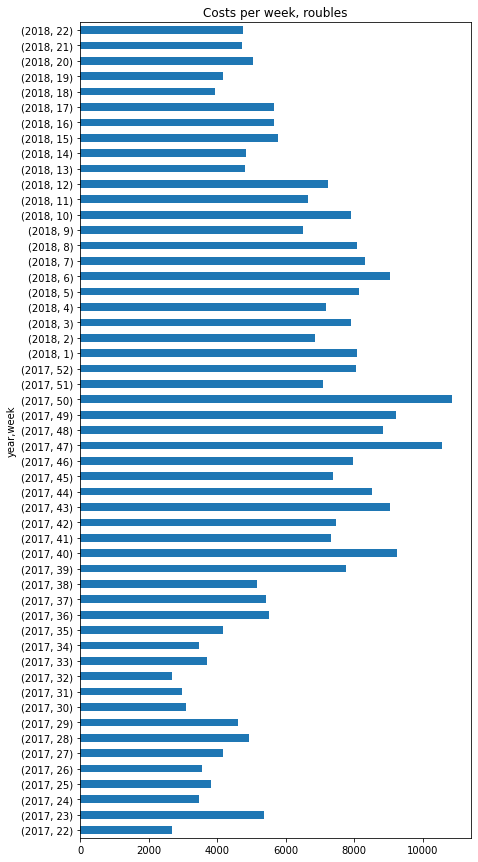

In [51]:
# Weeks' graph
costs_by_week.costs.plot(kind = 'barh', figsize =(7, 15))
plt.title('Costs per week, roubles')
plt.show()

### Customer Acquisition Cost (CAC) by sources

In [52]:
# Let's calculate the number of buyers rhat each source had attracted
buyers_by_source = visits_of_buyers.groupby('source_id').agg({'uid': 'nunique'})
buyers_by_source = buyers_by_source.rename(columns = {'source_id': 'source_id', 'uid': 'num_users'})
display(buyers_by_source)

,num_users
source_id,
1,7138
2,7305
3,13846
4,14253
5,10156
7,1
9,2793
10,1773


In [53]:
display(costs_by_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [54]:
# Let's merge the dataframe of sources of buyers with dataframe of costs for every source
costs_and_buyers = buyers_by_source.merge(costs_by_source, on = 'source_id')
# We'll calculate how much money is spent by every source to attract a buyer
costs_and_buyers['costs_per_buyer'] = costs_and_buyers.costs / costs_and_buyers.num_users
display(costs_and_buyers)

,source_id,num_users,costs,costs_per_buyer
0,1,7138,20833.27,2.918642
1,2,7305,42806.04,5.859828
2,3,13846,141321.63,10.206676
3,4,14253,61073.60,4.284965
4,5,10156,51757.10,5.096209
5,9,2793,5517.49,1.975471
6,10,1773,5822.49,3.283976


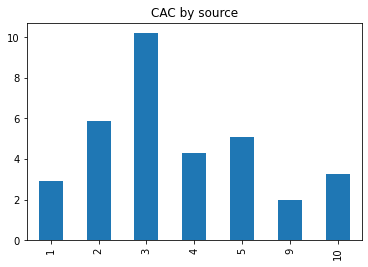

In [55]:
# Graph
ax = costs_and_buyers.costs_per_buyer.plot(kind = 'bar')
ax.set_xticklabels([tick for tick in costs_and_buyers.source_id])
plt.title('CAC by source')
plt.show()

In [56]:
# Average CAC for the whole observated period
cac = costs_and_buyers.costs_per_buyer.mean()
print(cac)

4.803680914859965


On average, advertising campaign costs are lower than revenues. But there is one exception: the cost of source number 3 is greater than the income from it.

### The cost of attracting a buyer for each advertising source by month

In [57]:
# Let's calculate the number of unique buyers for every month-source pair
buyers_by_source_per_month = visits_of_buyers.groupby(['source_id', 'month']).agg({'uid':'nunique'}).reset_index()
buyers_by_source_per_month = buyers_by_source_per_month.rename(columns = {'source_id': 'source_id', 'month': 'month', 'uid': 'num_users'})
display(buyers_by_source_per_month.head(10))

,source_id,month,num_users
0,1,2017-06-01,406
1,1,2017-07-01,437
2,1,2017-08-01,332
3,1,2017-09-01,594
4,1,2017-10-01,911
5,1,2017-11-01,1161
6,1,2017-12-01,1158
7,1,2018-01-01,848
8,1,2018-02-01,841
9,1,2018-03-01,915


In [58]:
# We'll calculate costs for every month-source pair
costs_grouped = costs.groupby(['source_id', 'year', 'month']).agg({'costs': 'sum'})
display(costs_grouped.head())

costs
source_id year month         
1         2017 6      1125.61
               7      1072.88
               8       951.81
               9      1502.01
               10     2315.75

In [59]:
# Let's merge dataframes  of buyers' number and costs for month-source pair
costs_and_buyers_per_month = costs_grouped.merge(buyers_by_source_per_month, on = 'source_id', how = 'left')
display(costs_and_buyers_per_month.head(10))

,source_id,costs,month,num_users
0,1,1125.61,2017-06-01,406
1,1,1125.61,2017-07-01,437
2,1,1125.61,2017-08-01,332
3,1,1125.61,2017-09-01,594
4,1,1125.61,2017-10-01,911
5,1,1125.61,2017-11-01,1161
6,1,1125.61,2017-12-01,1158
7,1,1125.61,2018-01-01,848
8,1,1125.61,2018-02-01,841
9,1,1125.61,2018-03-01,915


In [60]:
# We'll create column  costs_per_buyer in the new dataframe
costs_and_buyers_per_month['costs_per_buyer'] = costs_and_buyers_per_month.costs / costs_and_buyers_per_month.num_users
display(costs_and_buyers_per_month.head())

,source_id,costs,month,num_users,costs_per_buyer
0,1,1125.61,2017-06-01,406,2.772438
1,1,1125.61,2017-07-01,437,2.575767
2,1,1125.61,2017-08-01,332,3.390392
3,1,1125.61,2017-09-01,594,1.894966
4,1,1125.61,2017-10-01,911,1.235576


In [61]:
# We'll create pivot table where month is row, source is column, costs per buyer are value
costs_pivot = costs_and_buyers_per_month.pivot_table(index = 'month', columns = 'source_id', values = 'costs_per_buyer')
display(costs_pivot)

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,4.276123,6.953548,12.229286,6.924444,7.261097,2.568664,3.790684
2017-07-01,3.972782,6.485764,14.309602,5.911111,6.399246,2.838215,6.469433
2017-08-01,5.229234,9.076768,19.726637,8.426269,7.620303,2.189480,8.223856
2017-09-01,2.922737,5.207547,9.512765,4.847111,4.437337,1.810200,4.219196
2017-10-01,1.905714,3.202127,6.520932,2.563963,2.896636,1.259701,1.810476
2017-11-01,1.495354,2.698313,6.036290,2.237128,3.757048,0.840568,2.256779
2017-12-01,1.499228,2.813226,6.086203,2.128593,3.335724,1.089552,4.043396
2018-01-01,2.047295,3.538859,7.351312,2.685734,4.123415,1.222848,3.051619
2018-02-01,2.064335,3.483564,7.378949,2.663248,3.606264,1.259701,2.438229


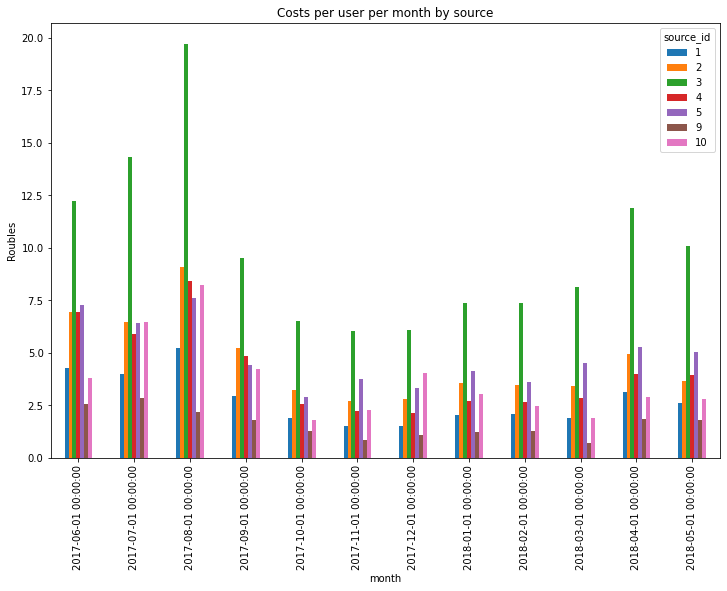

In [62]:
# Graph build by the pivot table
ax = costs_pivot.plot(kind = 'bar', figsize = (12, 8))
ax.set_ylabel('Roubles')
plt.title('Costs per user per month by source')
plt.show()

The graph of the cost of attracting a buyer by individual sources by months also shows that source 3 is especially costly.

### Return on Investment (ROI)  by sources

In [63]:
# We'll merge tables  of costs and revenues for buyers by sources
costs_and_revenue = costs_and_buyers.merge(revenue_per_buyer_by_source, on = 'source_id')
# We'll calculate the ROI in percents of costs
costs_and_revenue['roi'] = 100 * (costs_and_revenue.revenue - costs_and_revenue.costs_per_buyer) / costs_and_revenue.costs_per_buyer
display(costs_and_revenue)

,source_id,num_users,costs,costs_per_buyer,revenue,roi
0,1,7138,20833.27,2.918642,10.301913,252.969334
1,2,7305,42806.04,5.859828,15.071076,157.193161
2,3,13846,141321.63,10.206676,4.849823,-52.483816
3,4,14253,61073.60,4.284965,5.342538,24.681029
4,5,10156,51757.10,5.096209,5.901142,15.794737
5,9,2793,5517.49,1.975471,5.001399,153.175053
6,10,1773,5822.49,3.283976,3.312925,0.881515


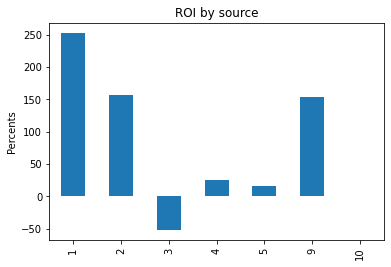

In [64]:
# Graph
ax = costs_and_revenue.roi.plot(kind = 'bar')
ax.set_xticklabels([tick for tick in costs_and_buyers.source_id])
ax.set_ylabel('Percents')
plt.title('ROI by source')
plt.show()

Source number 1 provides the highest return on investment. Each invested ruble brings two and a half profits. Sources 2 and 9 are also quite profitable - one and a half rubles of profit for each invested. The fourth and fifth sources bring several tens of kopecks per invested ruble. The third source brings a loss: it is not possible to return even fifty kopecks from each invested ruble.

## Step 3. Conclusions

A study of the activity of users of the service showed that the last depends on the season. The duration of most sessions is quite short (1-10 minutes), and the time interval between the first visit to the site and the first purchase is also short (median value is 16 minutes). This, apparently, indicates that the service is of interest to users primarily as a ticket office, and not as a poster: users know what they want to buy before contacting the service.

The retention rate is quite low: it does not exceed 9 percent. More research is needed to explain this.

Tips for marketers:
1. Make more use of sources 1, 2 and 9: they give the highest return on investment
2. Do not use source number 3 - it brings nothing but loss (or greatly reduce the cost of it).

It may be necessary to examine the data for several years to take into account the seasonality factor, which is very important in this case, as many of the graphs in this study showed. Without taking into account seasonality, it is difficult to say whether things began to go better or worse by the end of the study period.